# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Fajri
- Email:rfajri912@gmail.com
- Id Dicoding:rfajri255

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Menyiapkan data yang akan diguankan

In [2]:
employee_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv")
employee_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [3]:
# Check tipe data
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
# Check missing values
employee_df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [5]:
# Check duplikasi data
employee_df.duplicated().sum()

0

Pada proyek ini kita hanya akan menggunakan data yang tidak mengandung missing value.

In [6]:
employee_df = employee_df[~(employee_df["Attrition"].isna())]

In [7]:
# Drop kolom yang tidak dibutuhkan
new_employee_df = employee_df.drop(
    columns=["EmployeeId", "Over18", "StandardHours"], axis=1)

## Data Understanding

In [8]:
numerical_columns = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]
new_employee_df[numerical_columns].describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,809.542533,8.978261,2.712665,65.643667,2.73724,6625.945180,14267.281664,2.706994,15.155955,11.435728,2.769376,7.065217,4.26087,2.203214,4.142722
std,9.410421,408.478049,8.040608,1.092959,20.324861,0.70473,4837.695042,7048.077305,2.523526,3.641097,8.016429,1.302689,6.265227,3.61747,3.266948,3.599044
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.00000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,465.250000,2.000000,2.000000,48.000000,2.00000,2900.250000,8277.250000,1.000000,12.000000,6.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,817.500000,7.000000,3.000000,65.000000,3.00000,4903.500000,14201.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,1168.500000,13.000000,4.000000,83.000000,3.00000,8736.500000,20364.000000,4.000000,18.000000,16.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,4.000000,100.000000,4.00000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.00000,15.000000,17.000000


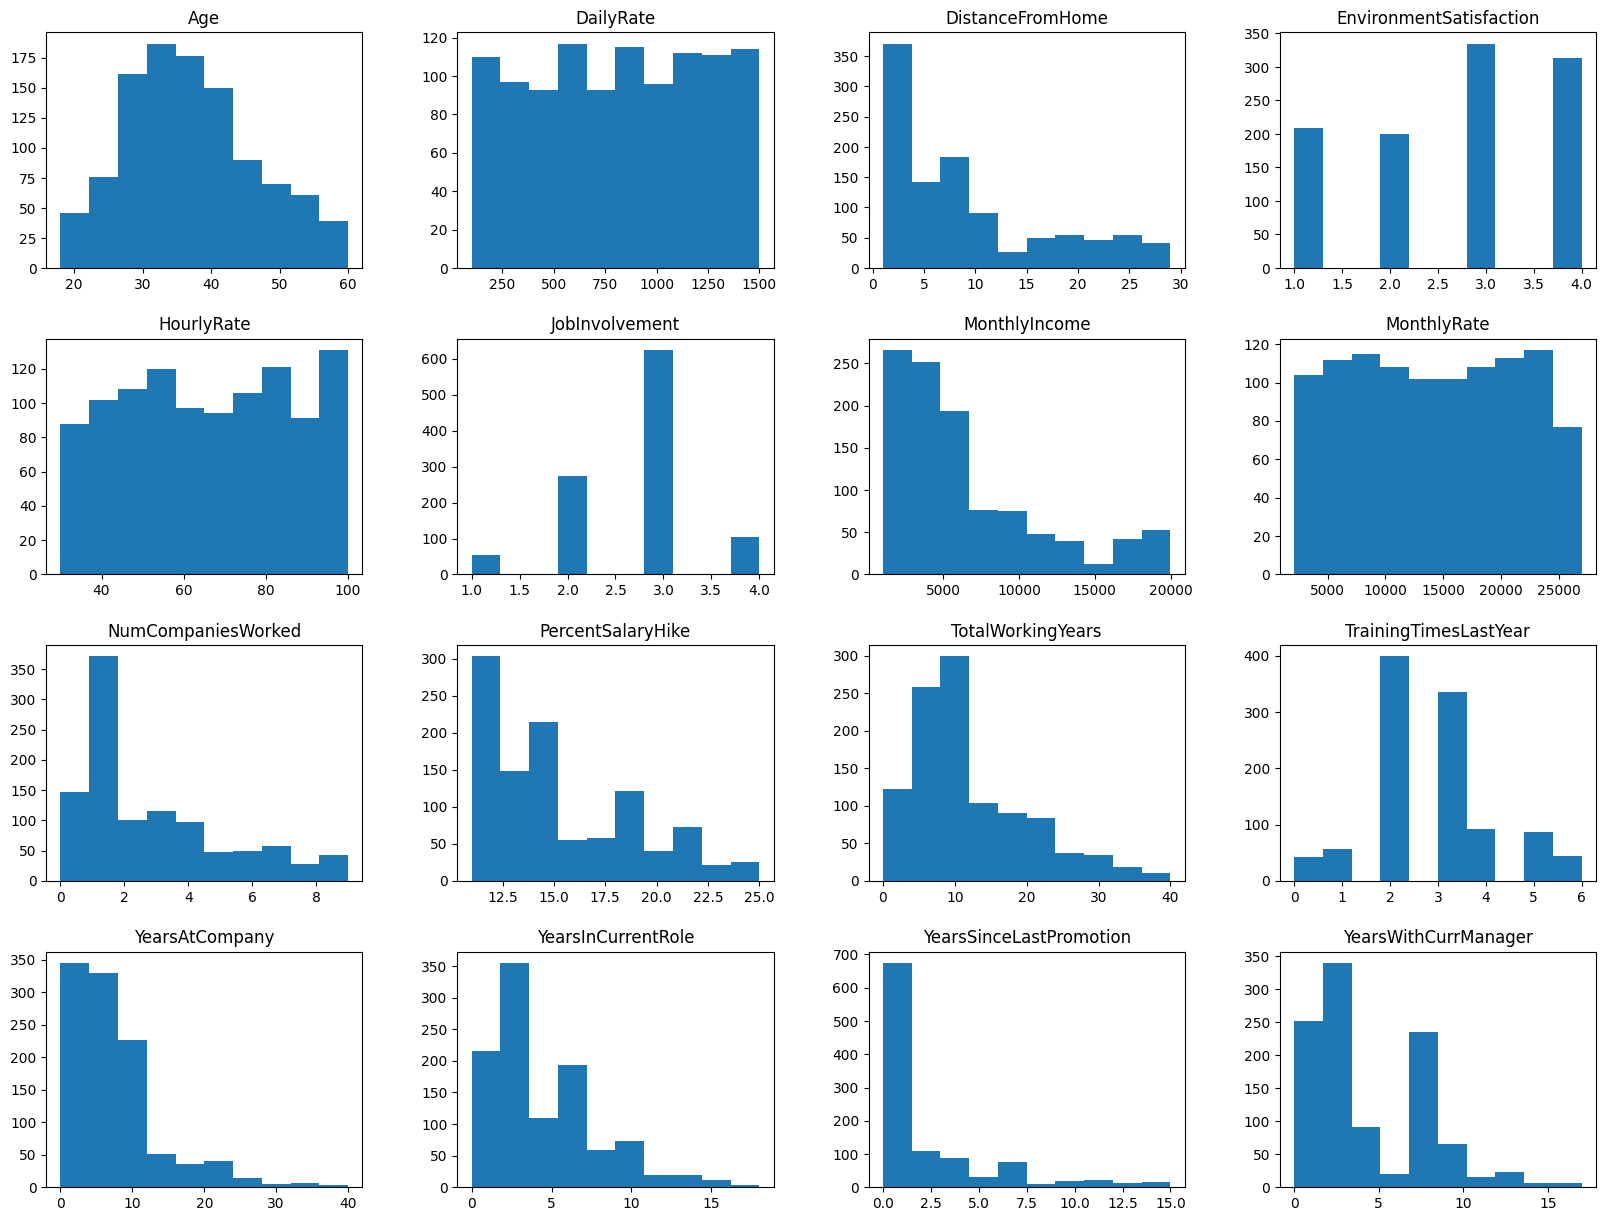

In [9]:
new_employee_df[numerical_columns].hist(bins=10, figsize=(20, 15), grid=False)
plt.show()

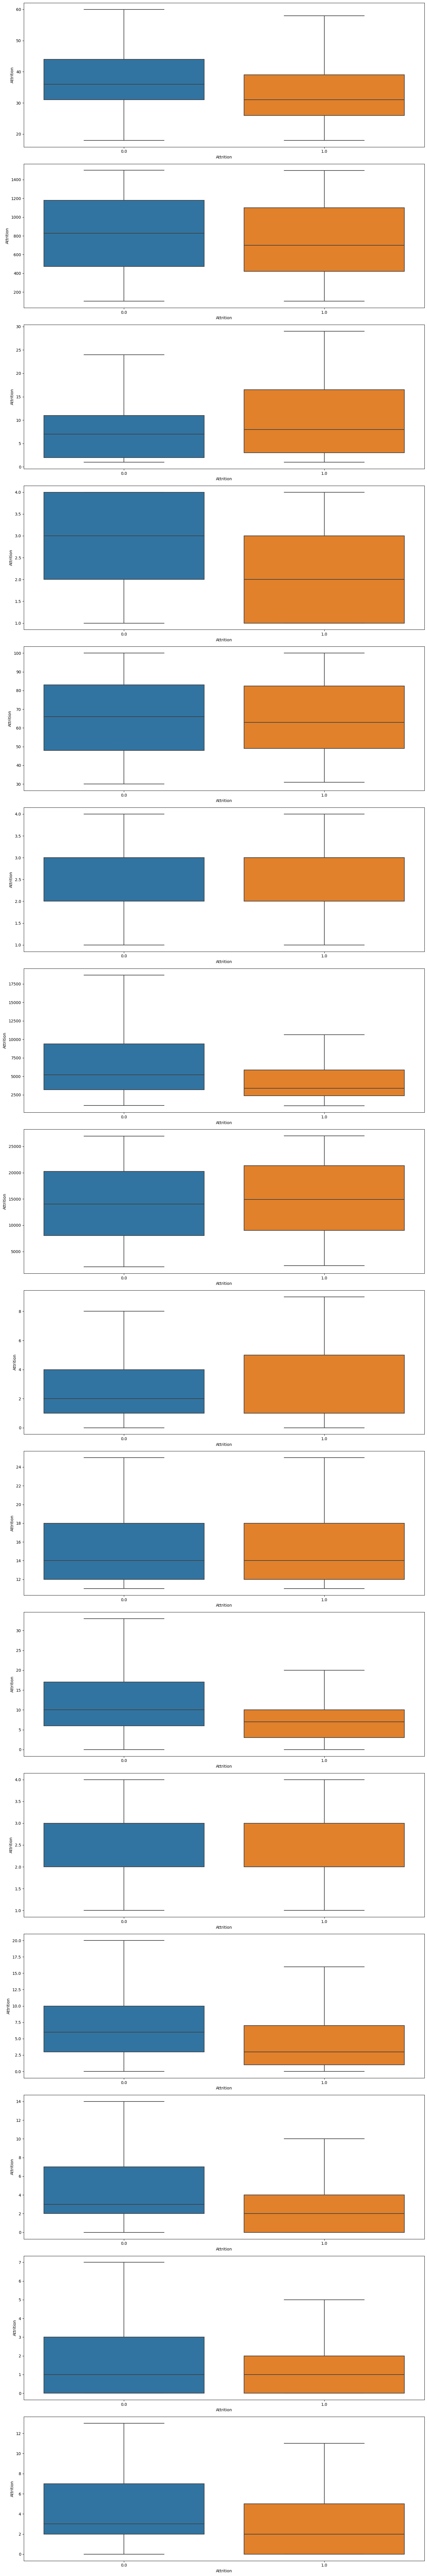

In [10]:
def box_plot(columns, df, labels=None, showfliers=False):
    '''Function untuk menampilkan boxplot'''
    fig, ax = plt.subplots(len(columns), 1, figsize=(15, 90))
    for i, column in enumerate(columns):
        if labels:
            sns.boxplot(x=labels, y=column, data=df,
                        ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(labels)
        else:
            sns.boxplot(x=column, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()


box_plot(
    columns=numerical_columns,
    df=new_employee_df,
    labels="Attrition"
)

Pegawai yang melakukan attrition memiliki karakteristik seperti berikut:

- Didominasi oleh employee yang memiliki umur lebih muda.
- Jarak rumah yang cenderung jauh dari kantor.
- Memiliki gaji yang cenderung lebih kecil.
- Memiliki pengalaman kerja yang sedikit.

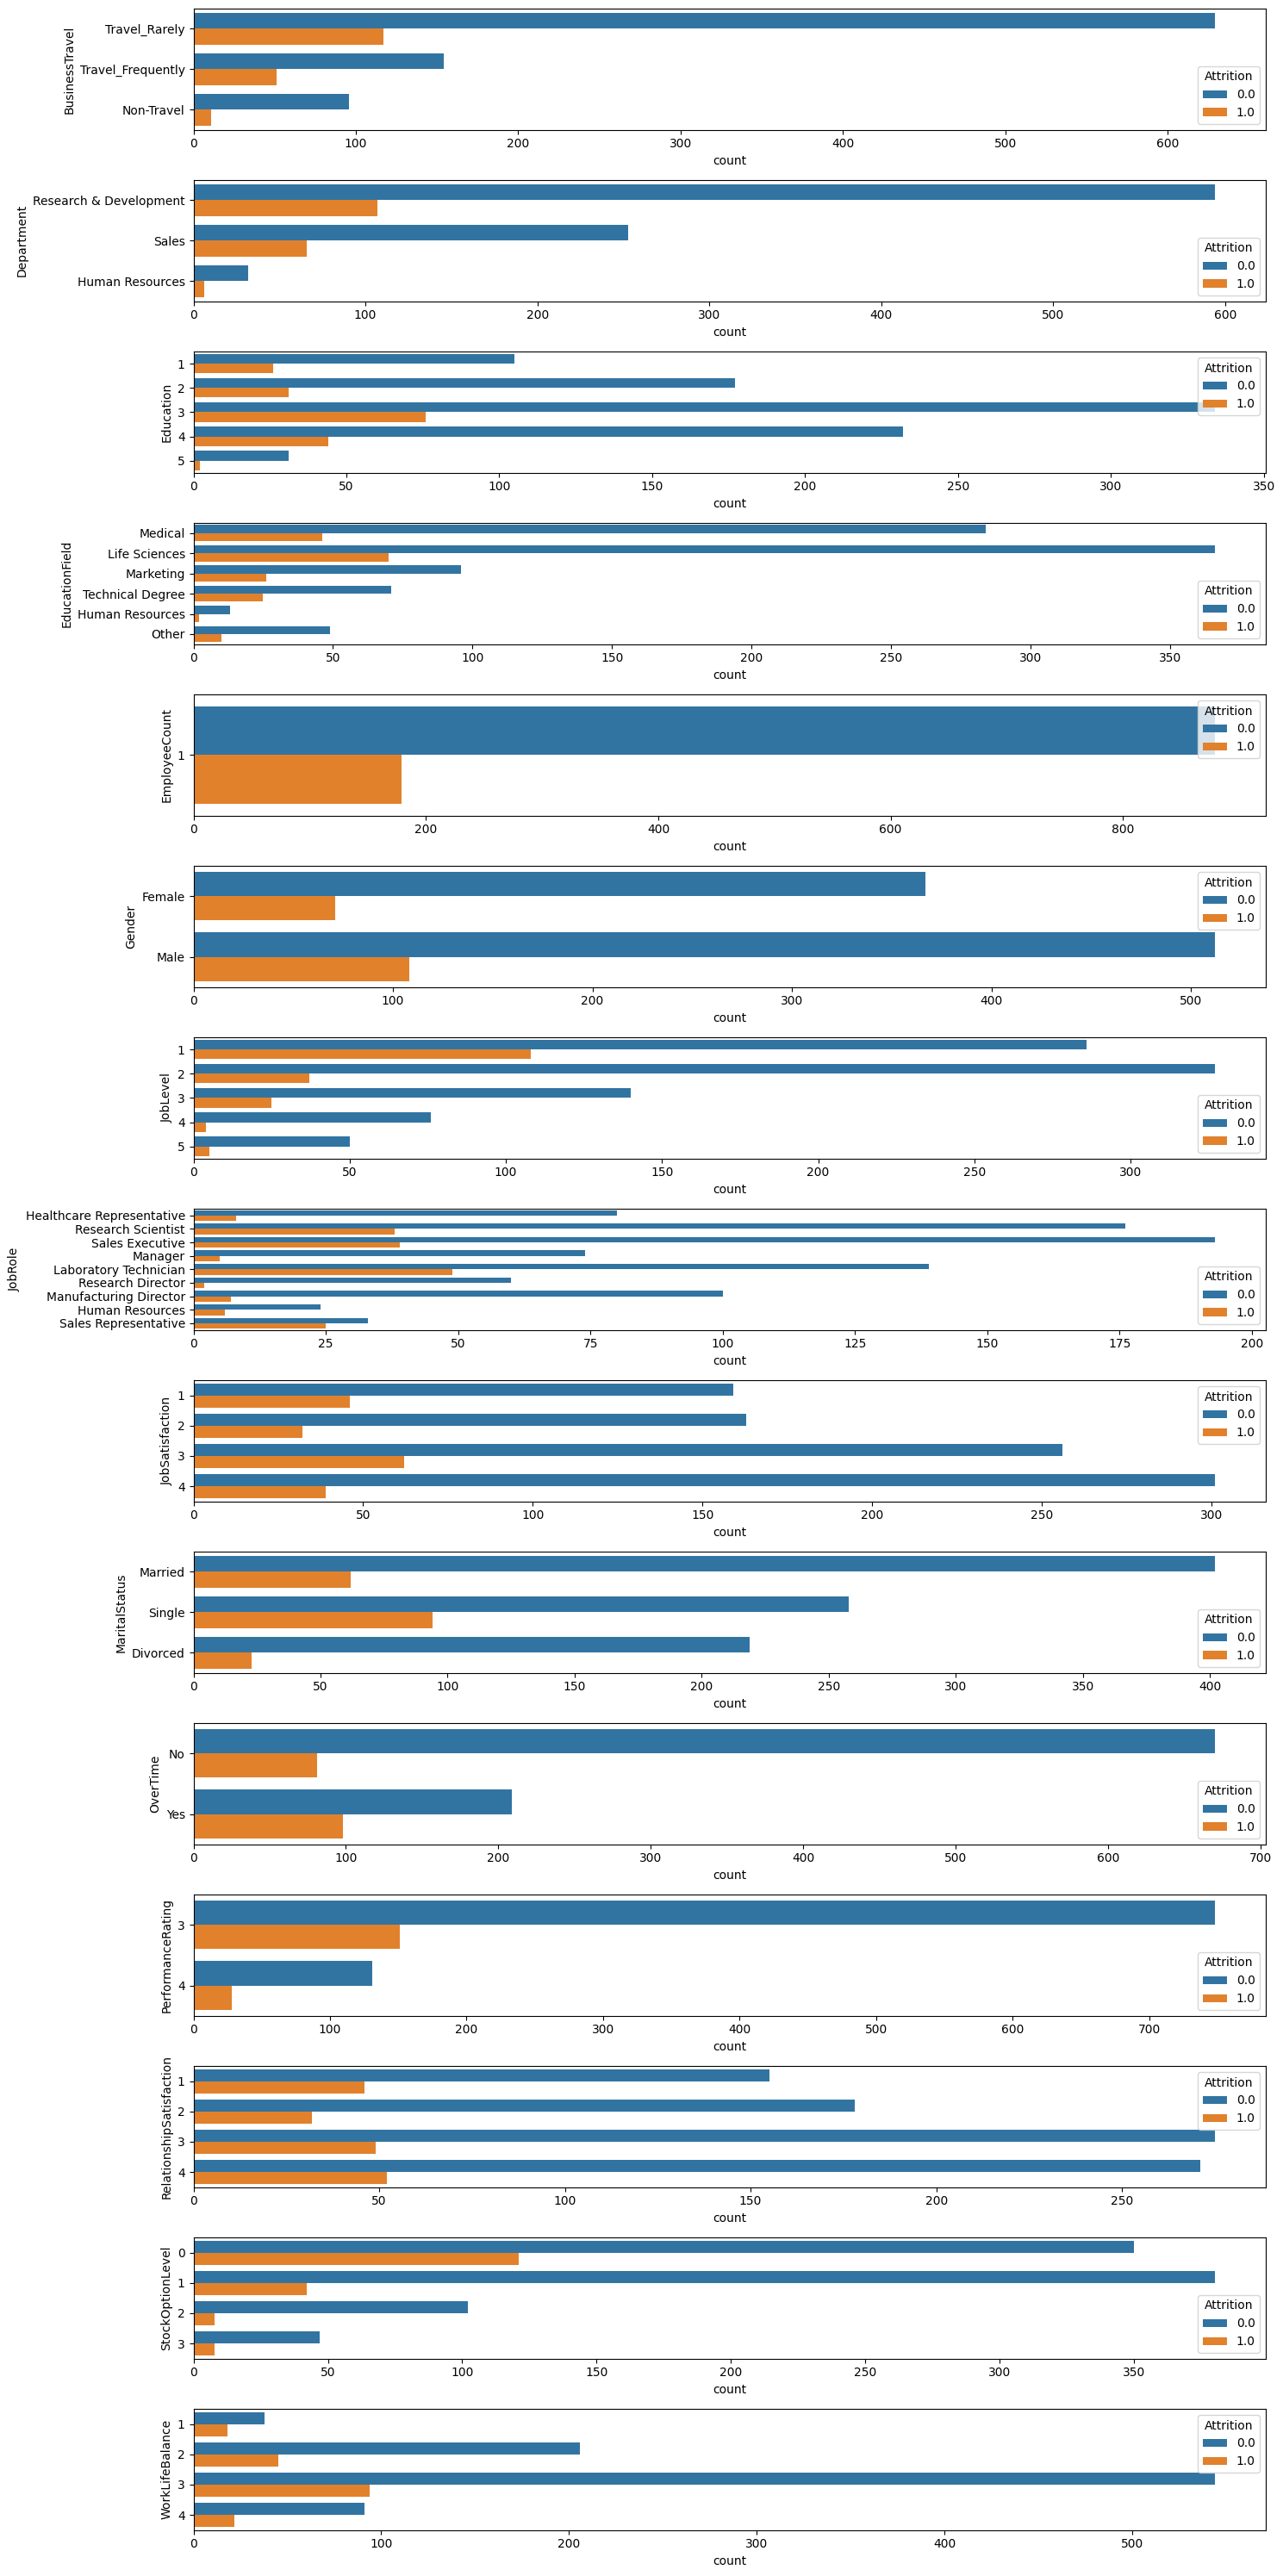

In [11]:
def categorical_plot(columns, df, label=None):
    fig, ax = plt.subplots(len(columns), 1, figsize=(15, 30))
    for i, column in enumerate(columns):
        if label:
            sns.countplot(data=df, y=column, hue=label, ax=ax[i])
        else:
            sns.countplot(data=df, y=column, ax=ax[i])
    plt.tight_layout()
    plt.show()


categorical_columns = new_employee_df.columns[~(
    new_employee_df.columns.isin(numerical_columns))]

categorical_plot(
    columns=categorical_columns[1:],
    df=new_employee_df,
    label="Attrition"
)

Pegawai yang melakukan attrition memiliki karakteristik seperti berikut:

- Employee yang melakukan attrition kebanyakan berstatus single atau belum berkeluarga.
- Employee yang memiliki performance rating yang rendah cenderung akan melakukan attrition.
- Employee dengan job level rendah cenderung melakukan attrition.

## Data Preparation / Preprocessing

Persiapkan dataset untuk klasifikasi. Jadikan kolom 'Attrition' sebagai target (y). Drop semua kolom yang dianggap tidak diperlukan.

In [12]:
classification_df = new_employee_df.drop(columns=['EnvironmentSatisfaction',
                                                  'HourlyRate',
                                                  'JobInvolvement',
                                                  'TrainingTimesLastYear',
                                                  'YearsSinceLastPromotion',
                                                  'Gender',
                                                  'RelationshipSatisfaction'], axis=1)

In [13]:
X = classification_df.drop(columns="Attrition", axis=1)
y = classification_df["Attrition"]

Lakukan train test split, test:test = 4:1, stratify = y.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

print("X_train: ", X_train.shape, " y_train:", y_train.shape)
print("X_test: ", X_test.shape, " y_test:", y_test.shape)

X_train:  (846, 24)  y_train: (846,)
X_test:  (212, 24)  y_test: (212,)


Lakukan feature engineering yang dianggap diperlukan pada trainset: imputation, encoding, scaling, selection, dll. Lakukan transformasi serupa pada testset tanpa melakukan fitting kembali.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib


def scaling(features, df, df_test=None):
    '''Melakukan Min-max scaling terhadap feature numerik'''
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1, 1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df


def encoding(features, df, df_test=None):
    '''Melakukan label encoding terhadap feature kategorik'''
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [16]:
numerical_columns = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsWithCurrManager'
]
categorical_columns = X_train.columns[~(
    X_train.columns.isin(numerical_columns))]

new_X_train, new_X_test = scaling(numerical_columns, X_train, X_test)
new_X_train, new_X_test = encoding(
    categorical_columns, new_X_train, new_X_test)

In [17]:
categorical_columns

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EmployeeCount', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 'PerformanceRating', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')

In [18]:
new_X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
# encoder = LabelEncoder()
# encoder.fit(y_train)
# new_y_train = encoder.transform(y_train)
# joblib.dump(encoder, "model/encoder_target.joblib")

# new_y_test = encoder.transform(y_test)

## Modeling

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1]
}

CV_xgb = GridSearchCV(estimator=xgb_model,
                      param_grid=param_grid, cv=5, n_jobs=-1)
CV_xgb.fit(new_X_train, y_train)
print("best parameters: ", CV_xgb.best_params_)
print("accuracy : ", CV_xgb.best_score_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}
accuracy :  0.8486947441698574


In [21]:
xgb_model = XGBClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=300
)
xgb_model.fit(new_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

## Evaluation

Classification report model XGBoost untuk data training

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       703
         1.0       1.00      1.00      1.00       143

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



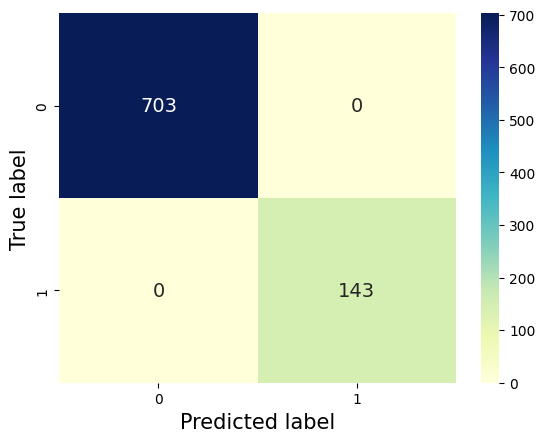

In [22]:
from sklearn.metrics import confusion_matrix, classification_report


def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    # labels = ['No', 'Yes']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true)
    confusion_matrix_df = pd.DataFrame(cnf_matrix)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={
                'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df


y_pred_train = xgb_model.predict(new_X_train)
# y_pred_train = encoder.inverse_transform(y_pred_train)

print("Classification report model XGBoost untuk data training\n")
confusion_matrix_df = evaluating(
    y_pred=y_pred_train, y_true=y_train.to_numpy())

In [85]:
new_X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,JobLevel,JobRole,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1341,0.476190,1,0.423049,1,0.214286,2,1,0,0,6,...,0.111111,0,0.000000,0,3,0.100,2,0.100,0.111111,0.176471
565,0.309524,2,0.162491,1,0.000000,1,1,0,0,2,...,0.111111,0,0.071429,0,1,0.100,2,0.100,0.111111,0.117647
1307,0.238095,2,0.395132,1,0.000000,1,1,0,0,6,...,0.777778,1,0.142857,0,0,0.250,2,0.175,0.388889,0.411765
1355,0.428571,1,0.332140,1,0.607143,3,1,0,0,2,...,0.444444,0,0.500000,0,2,0.100,2,0.025,0.000000,0.000000
352,0.523810,2,0.377953,2,0.107143,3,2,0,2,7,...,0.777778,0,0.000000,0,1,0.375,1,0.300,0.611111,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.571429,2,0.748031,0,0.321429,2,0,0,3,3,...,0.000000,0,0.214286,0,1,0.525,2,0.500,0.388889,0.529412
1301,0.404762,2,0.827487,1,0.000000,3,1,0,0,6,...,0.333333,0,0.142857,0,0,0.175,2,0.050,0.111111,0.117647
110,0.214286,2,0.566929,1,0.285714,2,3,0,0,6,...,0.111111,0,0.357143,0,0,0.175,1,0.175,0.388889,0.176471
1120,0.714286,2,0.801002,2,0.214286,2,2,0,1,7,...,0.444444,0,0.000000,0,3,0.375,2,0.050,0.111111,0.117647


Classification report model XGBoost untuk data testing

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       176
         1.0       0.60      0.33      0.43        36

    accuracy                           0.85       212
   macro avg       0.74      0.64      0.67       212
weighted avg       0.83      0.85      0.83       212



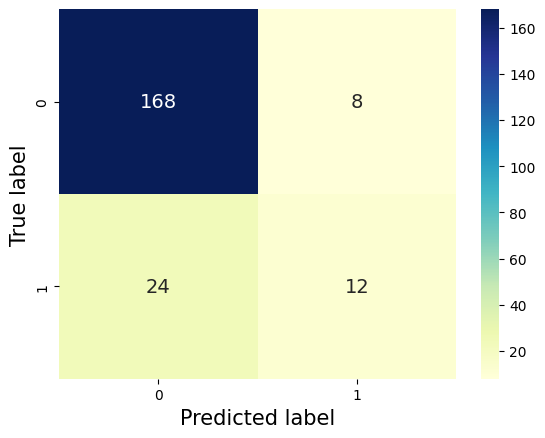

In [23]:
y_pred_test = xgb_model.predict(new_X_test)
# y_pred_test = encoder.inverse_transform(y_pred_test)

print("Classification report model XGBoost untuk data testing\n")
confusion_matrix_df = evaluating(y_pred=y_pred_test, y_true=y_test)

In [24]:
joblib.dump(xgb_model, "model/xgb_model.joblib")

['model/xgb_model.joblib']